<a href="https://colab.research.google.com/github/egecnoob/IA_1/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ------------------------------------------------------------
# Título: Análisis de K-medias (K-means)
# Autor: Adeptus Custodes
# Descripción:
#   - Carga un dataset CSV (Different_stores_data_V2.csv)
#   - Explica principios, parámetros y desafíos de K-medias
#   - Aplica métodos del codo e índice de silueta para elegir K óptimo
#   - Visualiza clústeres usando PCA
#   - Analiza centroides y características de cada clúster
# ------------------------------------------------------------

# ========================
# 1. Importar bibliotecas
# ========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# ========================
# 2. Principio de K-medias
# ========================
# K-medias particiona los datos en K clústeres, donde cada punto pertenece al clúster
# cuyo centroide (media aritmética de puntos en el clúster) es el más cercano.
# El objetivo es minimizar la suma de las distancias al cuadrado entre cada punto y su centroide.

# Parámetro clave:
#   - K: número de clústeres deseados.

# Desafíos comunes:
#   1. ¿Cómo determinar un K óptimo?
#       - Método del codo (Elbow Method): se grafica inercia (suma de distancias al cuadrado) vs. K
#         y se busca un “codo” donde la mejora se estabiliza.
#       - Método de la silueta (Silhouette): mide cuán bien separados están los clústeres.
#         Valor entre -1 y 1; valores cercanos a 1 indican clústeres bien definidos.
#   2. Sensibilidad a la inicialización de los centroides.
#   3. Forma de los clústeres: K-medias tiende a formar clústeres esféricos (convexos),
#      lo que puede no capturar formas complejas.


In [ ]:
# ==================================================
# 3. Cargar dataset y seleccionar características
# ==================================================

from google.colab import files
# Para subir manualmente el archivo, descomenta la siguiente línea y usa el selector:
# uploaded = files.upload()

# Leer el CSV en un DataFrame de pandas
df = pd.read_csv('Different_stores_data_V2.csv')

# Mostrar las primeras filas para verificar carga
print("Primeras filas del dataset original:")
print(df.head())

# Selección de características numéricas relevantes para clustering
features = ['age', 'quantity', 'selling_price_per_unit', 'total_profit']
data = df[features]

Primeras filas del dataset original:
  invoice_no     invoice_date customer_id  gender  age  category  quantity  \
0    I138884  10/30/2016 9:58     C241288  Female   28  Clothing         5   
1    I317333  10/30/2016 9:58     C111565    Male   21     Shoes         3   
2    I127801  10/30/2016 9:58     C266599    Male   20  Clothing         1   
3    I173702  10/30/2016 9:58     C988172  Female   66     Shoes         5   
4    I337046  10/30/2016 9:59     C189076  Female   53     Books         4   

   selling_price_per_unit  total_profit payment_method region       state  \
0                 1500.40       375.100    Credit Card  South    Kentucky   
1                 1800.51       540.153     Debit Card  South    Kentucky   
2                  300.08         5.020           Cash   West  California   
3                 3000.85       500.425    Credit Card  South     Florida   
4                   60.60        60.600           Cash  South     Florida   

    shopping_mall  
0          

In [ ]:
# ==============================
# 4. Escalado de características
# ==============================
# Escalar es importante para que todas las variables contribuyan de forma equivalente.
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


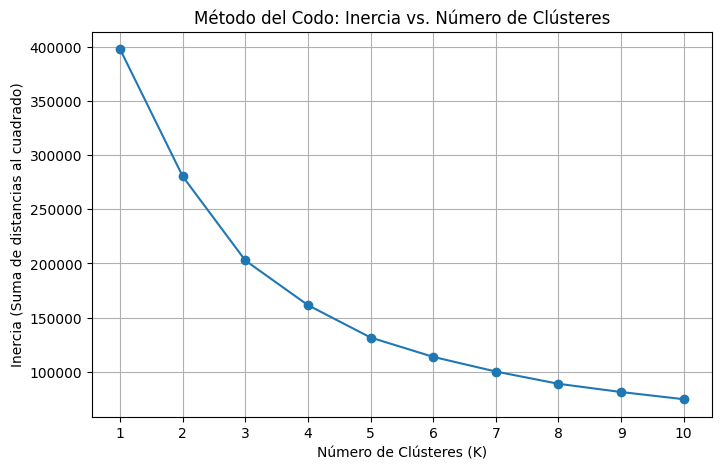

In [ ]:
# =============================
# 5. Método del Codo (Elbow)
# =============================
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

# Graficar curva de inercia vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo: Inercia vs. Número de Clústeres')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia (Suma de distancias al cuadrado)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [ ]:
# ===============================
# 6. Método de la Silueta
# ===============================
silhouette_scores = []
k_range_sil = range(2, 11)  # Silueta no está definida para K=1
for k in k_range_sil:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Graficar puntuación de silueta vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='orange')
plt.title('Método de la Silueta: Puntuación vs. Número de Clústeres')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Puntuación de Silueta')
plt.xticks(k_range_sil)
plt.grid(True)
plt.show()


In [ ]:
# ===================================
# 7. Ajuste final con K óptimo (Ej.)
# ===================================
# Basándonos en los dos métodos anteriores, supongamos que el valor óptimo es K=4.
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(data_scaled)

# Agregar etiquetas de clúster al DataFrame original
df['cluster'] = cluster_labels


In [ ]:

# ================================
# 8. Visualización en 2D con PCA
# ================================
# Reducir a 2 dimensiones para graficar
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    idx = df['cluster'] == cluster
    plt.scatter(data_pca[idx, 0], data_pca[idx, 1], label=f'Clúster {cluster}', alpha=0.6)
plt.title('Visualización de Clústeres en 2D (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# ================================
# 9. Análisis de los Centroides
# ================================
# Convertir centroides al espacio original (desescalar)
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids_original, columns=features)
centroid_df['cluster'] = range(optimal_k)

print("Centroides de Clúster en el espacio de características original:")
print(centroid_df)


In [ ]:

# ====================================
# 10. Tamaño de cada clúster
# ====================================
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_counts_df = pd.DataFrame({'cluster': cluster_counts.index, 'count': cluster_counts.values})

print("Número de puntos en cada clúster:")
print(cluster_counts_df)


In [ ]:

# ====================================
# 11. Promedios de características por clúster
# ====================================
cluster_means = df.groupby('cluster')[features].mean().reset_index()
print("Promedios de características por cada clúster:")
print(cluster_means)


In [ ]:

# ====================================
# 12. Inspección adicional (opcional)
# ====================================
# Aquí puedes agregar inspecciones más detalladas, gráficos de barras, etc.
# Por ejemplo: comparativa de la media de 'total_profit' entre clústeres
plt.figure(figsize=(6, 4))
plt.bar(cluster_means['cluster'], cluster_means['total_profit'])
plt.title('Total Profit Promedio por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Total Profit Promedio')
plt.grid(axis='y')
plt.show()
